In [3]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Ejemplo 1

Dada una señal de entrada y salida, obtenga el modelo estimado usando el modelo ARMAX.

In [52]:
## Sistema de segundo orden en tiempo continuo
tf = 7
dt = 1
g = control.tf([1],[1,1,5,3])
t = np.linspace(0,tf,int(tf/dt)+1)
A = 2
# Señal de salida ideal "y"
_,y = control.step_response(g,t)
N = len(t)
u = A*np.ones(N)
## Ruido para simular la señal de salida capturada "yn"
r = 0.05
e = np.random.normal(0,1,size=N)
yn = A*y+e*r

gd = control.c2d(g,dt)
print(gd)

#a = np.asarray([t,yn])
#a = a.transpose()
#np.savetxt('data\clase_09.csv', a, delimiter=",")

data = {'t':t,'yn':yn,'un':u}
df = pd.DataFrame(data)
df.to_csv('data\exercise_05.csv',index = False)


  0.1024 z^2 + 0.2451 z + 0.06279
------------------------------------
z^3 + 0.4116 z^2 + 0.1869 z - 0.3679

dt = 1



,t,yn,un
0,0.0,0.071189,2.0
1,1.0,0.205257,2.0
2,2.0,0.617343,2.0
3,3.0,0.444960,2.0
4,4.0,0.576571,2.0
5,5.0,0.809908,2.0
6,6.0,0.615673,2.0
7,7.0,0.721143,2.0


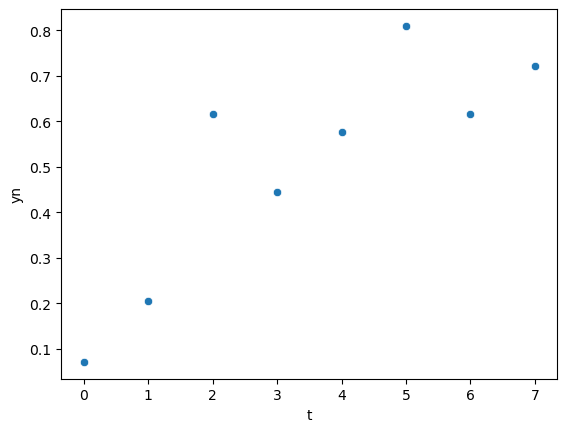

In [53]:
datos = pd.read_csv ('data\exercise_05.csv')
sns.scatterplot(datos,x ='t',y = 'yn' )
datos